# Politeness/Apology
How often do speakers use polite forms and apologize?

In [1]:
import pandas as pd
from scipy import stats

In [2]:
movies_df = pd.read_pickle(r'C:/Users/cassi/Desktop/Data_Science/Animated-Movie-Gendered-Dialogue/private/all_tagged_dialogue.pkl')

In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13442 entries, 0 to 13441
Data columns (total 19 columns):
Disney_Period       13442 non-null object
Gender              13442 non-null object
Movie               13442 non-null object
Role                13442 non-null object
Song                13442 non-null object
Speaker             13442 non-null object
Speaker_Status      13442 non-null object
Text                13442 non-null object
UTTERANCE_NUMBER    13442 non-null int64
Year                13442 non-null int64
Tokens              13442 non-null object
Types               13442 non-null object
Token_Count         13442 non-null int64
Type_Count          13442 non-null int64
POS                 13442 non-null object
Tag_Freq            13442 non-null object
Adj_Count           13442 non-null int64
Adv_Count           13442 non-null int64
Adj_over_Tokens     13442 non-null float64
dtypes: float64(1), int64(6), object(12)
memory usage: 1.3+ MB


In [4]:
#list of polite forms
polite = ['please', 'thank you', 'thanks', 'excuse me', 'pardon me']
#list of apologies
apology = ['sorry', 'apologies', 'my bad', 'forgive me']

In [5]:
movies_df['Polite_Count'] = movies_df.Text.map(lambda x: sum([x.count(y) for y in polite]))

In [6]:
movies_df['Apology_Count'] = movies_df.Text.map(lambda x: sum([x.count(y) for y in apology]))

In [7]:
movies_df['Polite_Count'].describe()

count    13442.000000
mean         0.028270
std          0.191178
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: Polite_Count, dtype: float64

In [8]:
movies_df['Apology_Count'].describe()

count    13442.000000
mean         0.012945
std          0.125514
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: Apology_Count, dtype: float64

In [9]:
movies_df[movies_df.Polite_Count >=1].shape #only 335 polite lines...

(335, 21)

In [10]:
movies_df[movies_df.Apology_Count >=1].shape #only 160 apology lines...

(160, 21)

In [11]:
#female polite utterances
movies_df[(movies_df.Polite_Count >=1) & (movies_df.Gender == 'f')].shape

(142, 21)

In [12]:
#male polite utterances
movies_df[(movies_df.Polite_Count >=1) & (movies_df.Gender == 'm')].shape

(192, 21)

In [13]:
#protagonist polite utterances
movies_df[(movies_df.Polite_Count >=1) & (movies_df.Role == 'PRO')].shape

(211, 21)

In [14]:
#antagonist polite utterances
movies_df[(movies_df.Polite_Count >=1) & (movies_df.Role == 'ANT')].shape

(32, 21)

In [15]:
#helper polite utterances
movies_df[(movies_df.Polite_Count >=1) & (movies_df.Role == 'HELPER')].shape

(57, 21)

# Politeness


## Visualizations

In [16]:
from matplotlib import pyplot as plt

In [17]:
movies_gender_df = movies_df[movies_df.Gender != 'n']

In [18]:
politeness_by_gender = movies_gender_df.groupby('Gender')['Polite_Count'].describe()['mean']
politeness_by_gender

Gender
f    0.038899
m    0.024119
Name: mean, dtype: float64

In [19]:
movies_gender_df.groupby('Gender')['Polite_Count'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,4216.0,0.038899,0.232384,0.0,0.0,0.0,0.0,5.0
m,8914.0,0.024119,0.171390,0.0,0.0,0.0,0.0,3.0


Most lines aren't apologies at all. But the mean for female characters is still higher. This average means that most female characters use 0.038 polite forms per line! Let's look at how the distribution looks inside a dataframe only containing polite forms

In [20]:
polite_df = movies_df[(movies_df.Polite_Count >= 1) & (movies_df.Gender != 'n')]

In [21]:
polite_df.groupby('Gender')['Polite_Count'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,142.0,1.154930,0.562363,1.0,1.0,1.0,1.0,5.0
m,192.0,1.119792,0.370685,1.0,1.0,1.0,1.0,3.0


In [22]:
polite_df[polite_df.Polite_Count >=2].shape #how many have over 1 polite word in their utterance?

(33, 21)

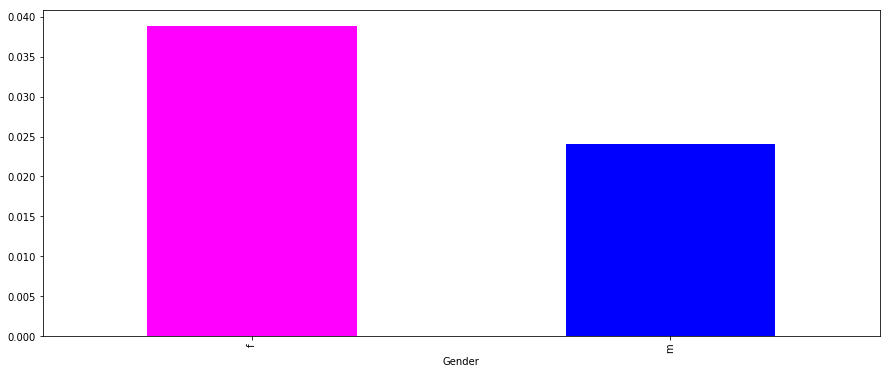

In [23]:
politeness_by_gender.plot.bar(color = ['magenta', 'blue'], figsize = (15,6))

It looks like overall, female characters use polite forms much more often than male characters do.

## Analysis by Role

In [24]:
movies_role_df = movies_df[movies_df.Role != 'N']

In [25]:
polite_df_2 = movies_df[(movies_df.Polite_Count >= 1) & (movies_df.Gender != 'n')]

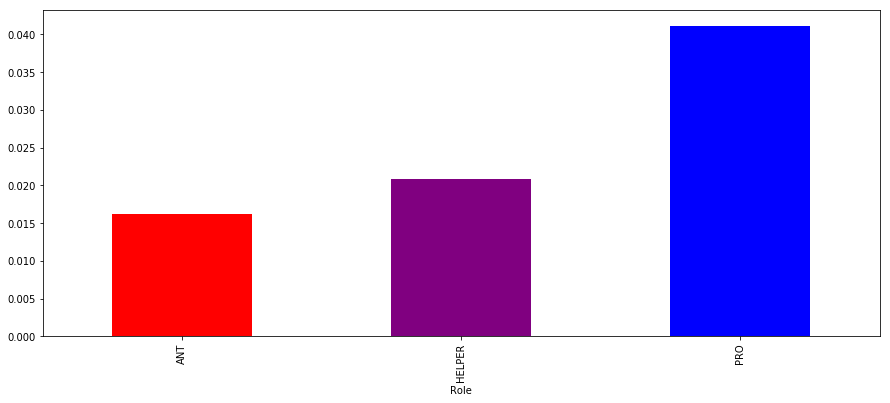

In [26]:
politeness_by_role = movies_role_df.groupby('Role')['Polite_Count'].describe()['mean']
politeness_by_role.plot.bar(color = ['red', 'purple', 'blue'], figsize = (15,6))

Protagonists use polite forms over twice as often as antagonists!

In [27]:
movies_role_df.Gender.value_counts()

m    7498
f    3822
n      28
Name: Gender, dtype: int64

In [28]:
movies_role_gen_df = movies_df[(movies_df.Gender != 'n') & (movies_df.Role != 'N')]

In [29]:
movies_role_gen_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11320 entries, 0 to 13441
Data columns (total 21 columns):
Disney_Period       11320 non-null object
Gender              11320 non-null object
Movie               11320 non-null object
Role                11320 non-null object
Song                11320 non-null object
Speaker             11320 non-null object
Speaker_Status      11320 non-null object
Text                11320 non-null object
UTTERANCE_NUMBER    11320 non-null int64
Year                11320 non-null int64
Tokens              11320 non-null object
Types               11320 non-null object
Token_Count         11320 non-null int64
Type_Count          11320 non-null int64
POS                 11320 non-null object
Tag_Freq            11320 non-null object
Adj_Count           11320 non-null int64
Adv_Count           11320 non-null int64
Adj_over_Tokens     11320 non-null float64
Polite_Count        11320 non-null int64
Apology_Count       11320 non-null int64
dtypes: float64(

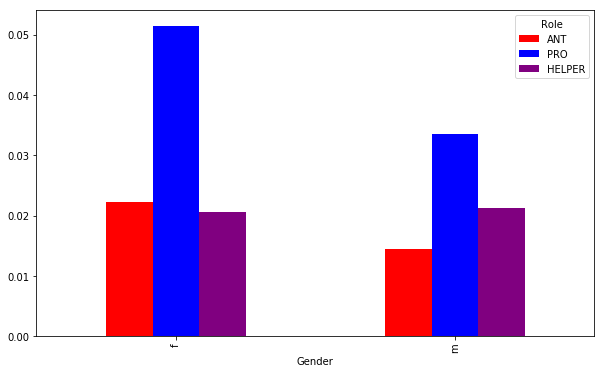

In [30]:
politeness_by_gen_role = movies_role_gen_df.groupby(['Gender', 'Role'], sort=False)['Polite_Count'].describe()['mean']
politeness_by_gen_role.unstack().plot.bar(color = ['red', 'blue', 'purple'], figsize = (10,6))

In [31]:
politeness_by_gen_role

Gender  Role  
f       ANT       0.022222
        PRO       0.051492
        HELPER    0.020541
m       ANT       0.014502
        PRO       0.033494
        HELPER    0.021170
Name: mean, dtype: float64

In both genders, protagonists apologize over twice as often as antagonists. Even so, female protagonists and antagonists still apologize more than their male counterparts.

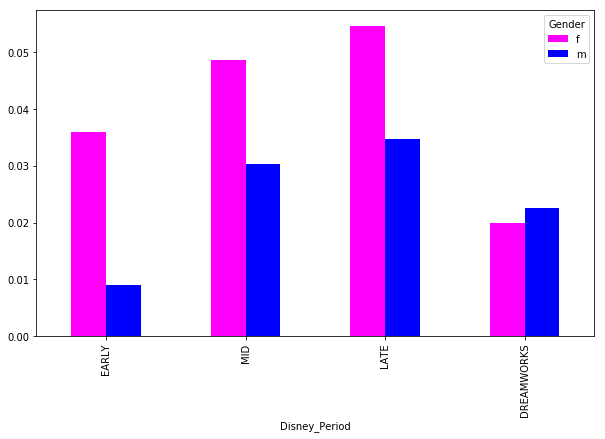

In [32]:
politeness_by_gen_era = movies_role_gen_df.groupby(['Disney_Period', 'Gender'], sort=False)['Polite_Count'].describe()['mean']
politeness_by_gen_era.unstack().plot.bar(color = ['magenta', 'blue'], figsize = (10,6))

Interesting. Polite forms have become more frequent over time in Disney movies for both male and female characters. Even so, in each era, women use polite forms much more often. It seems like the difference has shrunk over time though.

Also, suprisingly, male dreamworks characters actually use more polite forms than female dreamworks characters!!!

In [33]:
politeness_by_gen_era

Disney_Period  Gender
EARLY          f         0.035868
               m         0.009063
MID            f         0.048544
               m         0.030285
LATE           f         0.054653
               m         0.034627
DREAMWORKS     f         0.020000
               m         0.022517
Name: mean, dtype: float64

In [34]:
disney_role_gen_df = movies_role_gen_df[movies_role_gen_df.Disney_Period != 'DREAMWORKS']

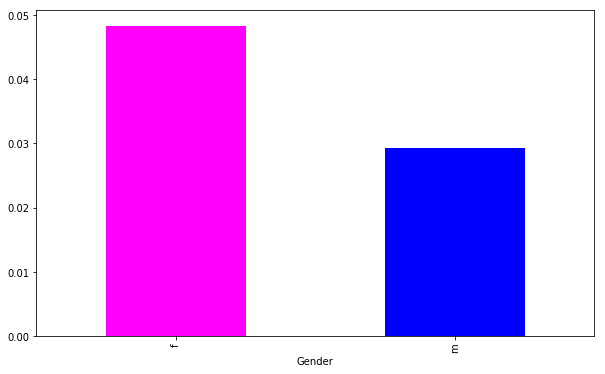

In [35]:
politeness_by_gen_era = disney_role_gen_df.groupby(['Gender'], sort=False)['Polite_Count'].describe()['mean']
politeness_by_gen_era.plot.bar(color = ['magenta', 'blue'], figsize = (10,6))

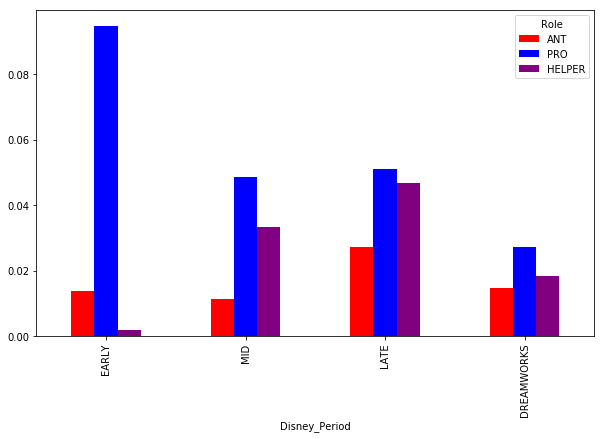

In [36]:
politeness_by_gen_era = movies_role_gen_df.groupby(['Disney_Period', 'Role'], sort=False)['Polite_Count'].describe()['mean']
politeness_by_gen_era.unstack().plot.bar(color = ['red', 'blue', 'purple'], figsize = (10,6))

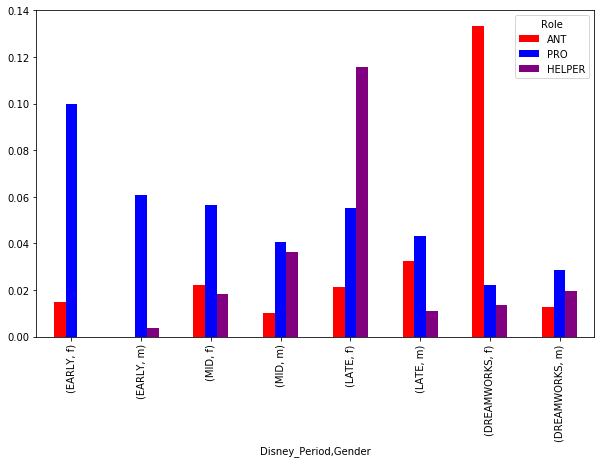

In [37]:
politeness_by_gen_era = movies_role_gen_df.groupby(['Disney_Period','Gender', 'Role'], sort=False)['Polite_Count'].describe()['mean']
politeness_by_gen_era.unstack().plot.bar(color = ['red', 'blue', 'purple'], figsize = (10,6))

In [38]:
movies_df[(movies_df.Role == 'ANT') & (movies_df.Gender == 'f') & (movies_df.Disney_Period == 'DREAMWORKS')].Speaker.unique()

array(['rapunzel'], dtype=object)

In [39]:
#Finally, let's look at subplots of gender by role for each era
movies_early_df = movies_role_gen_df[movies_role_gen_df.Disney_Period == 'EARLY']
movies_mid_df = movies_role_gen_df[movies_role_gen_df.Disney_Period == 'MID']
movies_late_df = movies_role_gen_df[movies_role_gen_df.Disney_Period == 'LATE']
movies_dw_df = movies_role_gen_df[movies_role_gen_df.Disney_Period == 'DREAMWORKS']

politeness_early = movies_early_df.groupby(['Disney_Period','Gender', 'Role'])['Polite_Count'].describe()['mean']
politeness_mid = movies_mid_df.groupby(['Disney_Period','Gender', 'Role'])['Polite_Count'].describe()['mean']
politeness_late = movies_late_df.groupby(['Disney_Period','Gender', 'Role'])['Polite_Count'].describe()['mean']
politeness_dw = movies_dw_df.groupby(['Disney_Period','Gender', 'Role'])['Polite_Count'].describe()['mean']


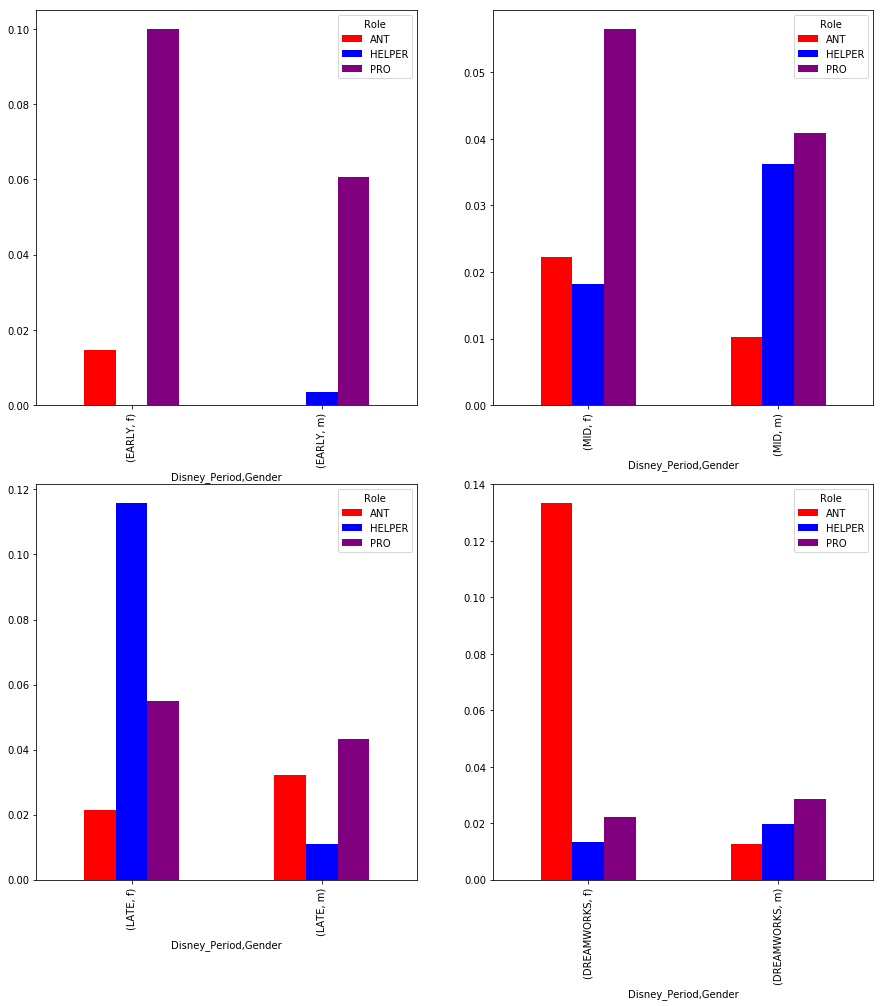

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,16))
politeness_early.unstack().plot.bar(color = ['red', 'blue', 'purple'], ax=axes[0,0])
politeness_mid.unstack().plot.bar(color = ['red', 'blue', 'purple'], ax=axes[0,1])
politeness_late.unstack().plot.bar(color = ['red', 'blue', 'purple'], ax=axes[1,0])
politeness_dw.unstack().plot.bar(color = ['red', 'blue', 'purple'], ax=axes[1,1])

# Apology
## Visualizations

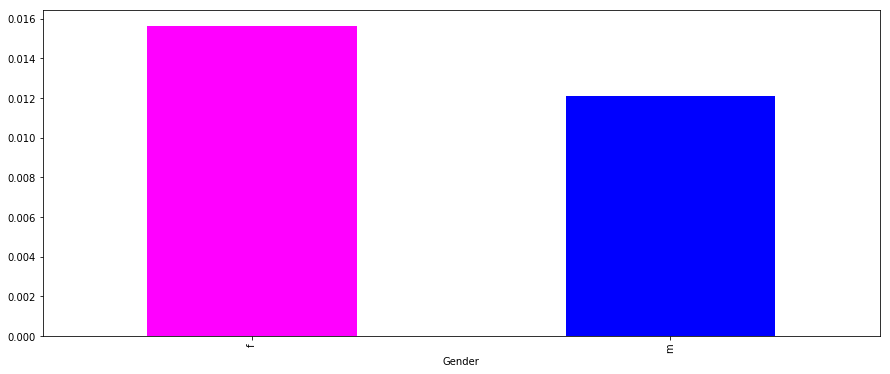

In [41]:
apology_by_gender = movies_gender_df.groupby('Gender')['Apology_Count'].describe()['mean']
apology_by_gender.plot.bar(color = ['magenta', 'blue'], figsize = (15,6))

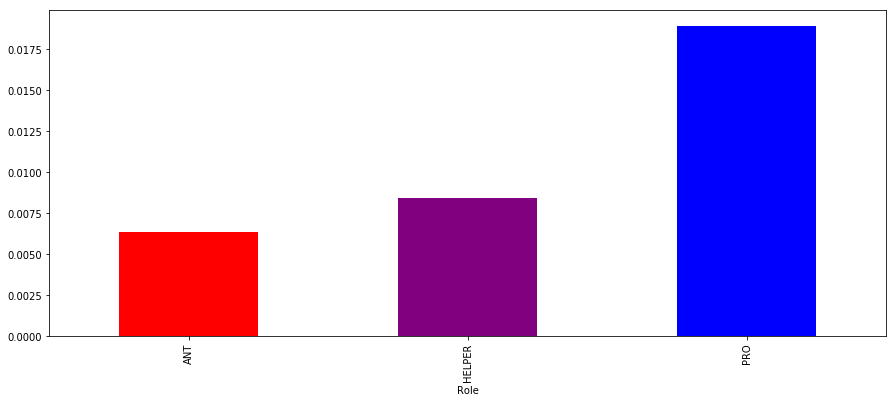

In [42]:
apology_by_role = movies_role_df.groupby('Role')['Apology_Count'].describe()['mean']
apology_by_role.plot.bar(color = ['red', 'purple', 'blue'], figsize = (15,6))

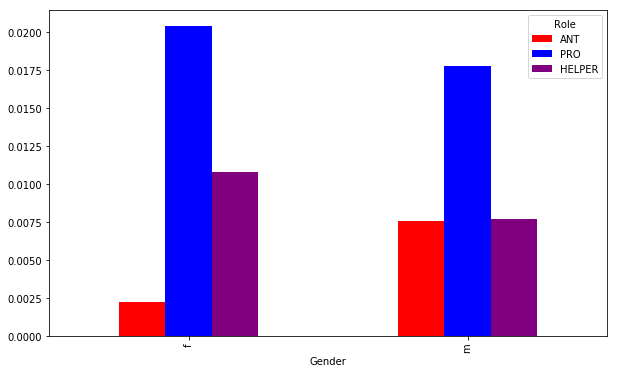

In [43]:
apology_by_gen_role = movies_role_gen_df.groupby(['Gender', 'Role'], sort=False)['Apology_Count'].describe()['mean']
apology_by_gen_role.unstack().plot.bar(color = ['red', 'blue', 'purple'], figsize = (10,6))

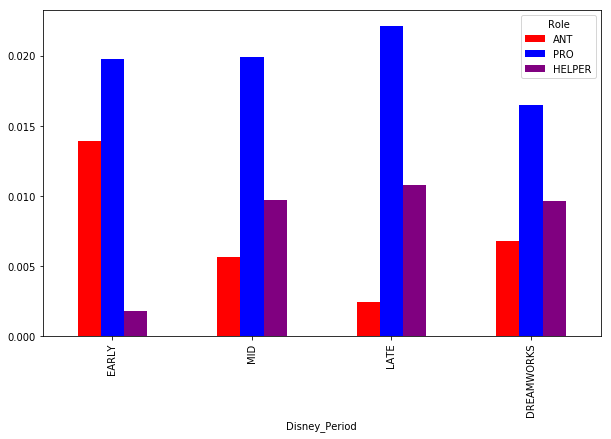

In [44]:
apology_by_gen_era = movies_role_gen_df.groupby(['Disney_Period', 'Role'], sort=False)['Apology_Count'].describe()['mean']
apology_by_gen_era.unstack().plot.bar(color = ['red', 'blue', 'purple'], figsize = (10,6))

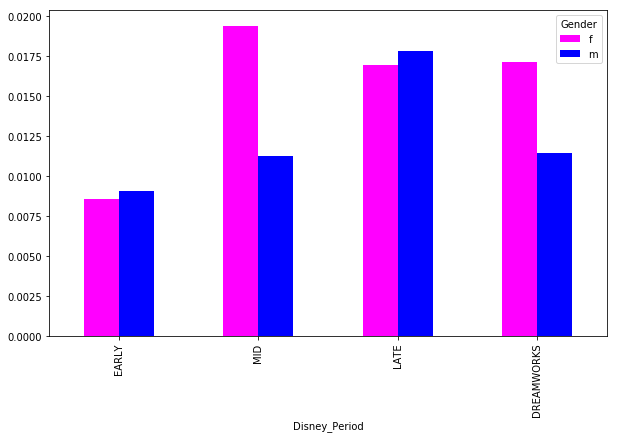

In [45]:
apology_by_gen_era = movies_role_gen_df.groupby(['Disney_Period', 'Gender'], sort=False)['Apology_Count'].describe()['mean']
apology_by_gen_era.unstack().plot.bar(color = ['magenta', 'blue'], figsize = (10,6))

In [46]:
apology_early = movies_early_df.groupby(['Disney_Period','Gender', 'Role'])['Apology_Count'].describe()['mean']
apology_mid = movies_mid_df.groupby(['Disney_Period','Gender', 'Role'])['Apology_Count'].describe()['mean']
apology_late = movies_late_df.groupby(['Disney_Period','Gender', 'Role'])['Apology_Count'].describe()['mean']
apology_dw = movies_dw_df.groupby(['Disney_Period','Gender', 'Role'])['Apology_Count'].describe()['mean']

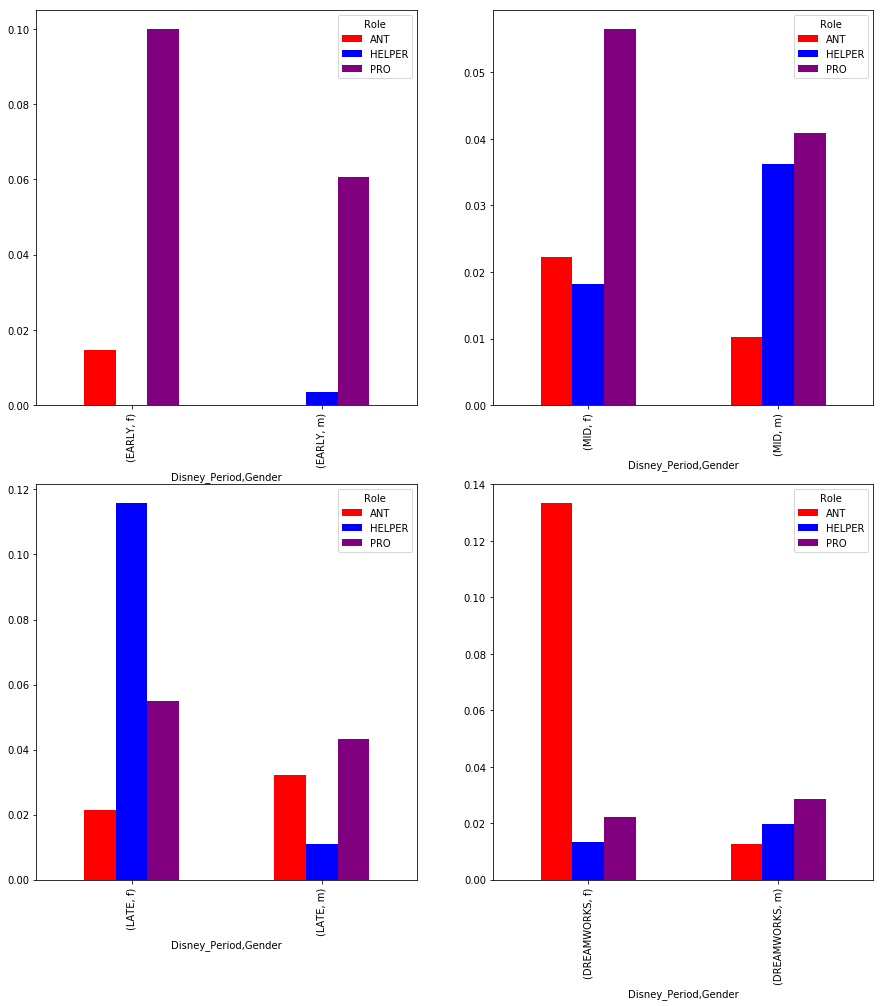

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,16))
politeness_early.unstack().plot.bar(color = ['red', 'blue', 'purple'], ax=axes[0,0])
politeness_mid.unstack().plot.bar(color = ['red', 'blue', 'purple'], ax=axes[0,1])
politeness_late.unstack().plot.bar(color = ['red', 'blue', 'purple'], ax=axes[1,0])
politeness_dw.unstack().plot.bar(color = ['red', 'blue', 'purple'], ax=axes[1,1])

# Significance Tests
Are any of these differences significant? Specifically, we'll look at:
* Overall, do women use polite words more than men?
* Overall, do pros use polite words more than ants?
* Within each era, is there a significant difference btw how men and women use politeness?
* Across eras, do apology counts change for each gender and role?
* Within each company, is there a significant difference btw how men and women use politeness?
* Across companies, do politeness/apology counts change for each gender and role?
* Overall, do female pros use polite words more than female ants?
* Overall, do male pros use polite words more than male ants?

## Politeness

### Gender
#### Gender Overall